# EDA of "ChatGPT Classification Dataset"
#### Kaggle description
We have compiled a dataset that consists of textual articles including common terminology, concepts and definitions in the field of computer science, artificial intelligence, and cyber security. This dataset consists of both human-generated text and OpenAI’s ChatGPT-generated text. Human-generated answers were collected from different computer science dictionaries and encyclopedias including “The Encyclopedia of Computer Science and Technology” and "Encyclopedia of Human-Computer Interaction". AI-generated content in our dataset was produced by simply posting questions to OpenAI’s ChatGPT and manually documenting the resulting responses. A rigorous data-cleaning process has been performed to remove unwanted Unicode characters, styling and formatting tags. To structure our dataset for binary classification, we combined both AI-generated and Human-generated answers into a single column and assigned appropriate labels to each data point (Human-generated = 0 and AI-generated = 1).

This creates our article-level dataset (article_level_data.csv) which consists of a total of 1018 articles, 509 AI-generated and 509 Human-generated. Additionally, we have divided each article into its sentences and labelled them accordingly. This is mainly to evaluate the performance of classification models and pipelines when it comes to shorter sentence-level data points. This constructs our sentence-level dataset (sentence_level_data.csv) which consists of a total of 7344 entries (4008 AI-generated and 3336 Human-generated). 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("article_level_data.csv" , index_col= False )
data.drop(columns=["Unnamed: 0"])
data.head(5)

,Unnamed: 0,article,class
0,0,NLP is a multidisciplinary field that draws fr...,0
1,1,There are a variety of emerging applications f...,0
2,2,As each new means of communication and social ...,0
3,3,"These suggestions include:, Learn about the pu...",0
4,4,In recent years there has been growing concern...,0


In [3]:
print(data.shape)
data.info()

(1018, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1018 non-null   int64 
 1   article     1018 non-null   object
 2   class       1018 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ KB


In [4]:
# Checking missin values.
data.isna().sum()

Unnamed: 0    0
article       0
class         0
dtype: int64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

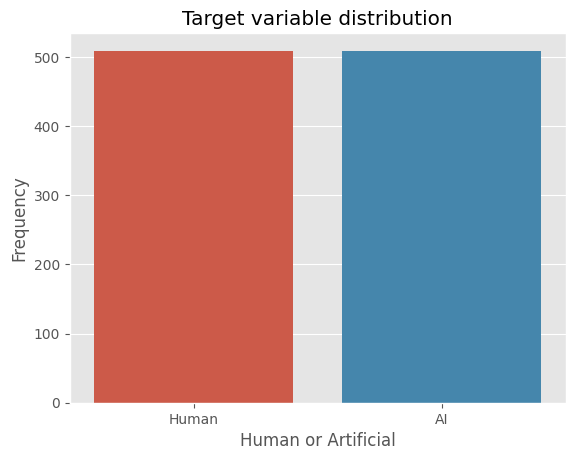

In [6]:
# Let's see the target class distribution
fig = sns.countplot(data, x = 'class')
fig.set(title = 'Target variable distribution', xlabel = 'Human or Artificial', ylabel = 'Frequency', xticklabels=['Human','AI'] )
plt.show()
# We have a very balanced dataset

# EDA --> Counts and lengths

#### Lenght

In [12]:
def article_length(text):
    return len(text)

data['length'] = data['article'].apply(article_length) 
data

,Unnamed: 0,article,class,length,words
0,0,NLP is a multidisciplinary field that draws fr...,0,1112,187
1,1,There are a variety of emerging applications f...,0,630,82
2,2,As each new means of communication and social ...,0,1135,176
3,3,"These suggestions include:, Learn about the pu...",0,1018,173
4,4,In recent years there has been growing concern...,0,699,111
...,...,...,...,...,...
1013,1013,Palettes can refer to different things dependi...,1,777,132
1014,1014,Probability is a measure of the likelihood tha...,1,893,148
1015,1015,A compiler is a software program that translat...,1,1404,217
1016,1016,The compilation process is the process by whic...,1,1576,238


In [13]:
print(data[data['class']==0].length.mean())
print(data[data['class']==1].length.mean())
# Not a big difference in the article's length

905.5795677799607
1124.7976424361493


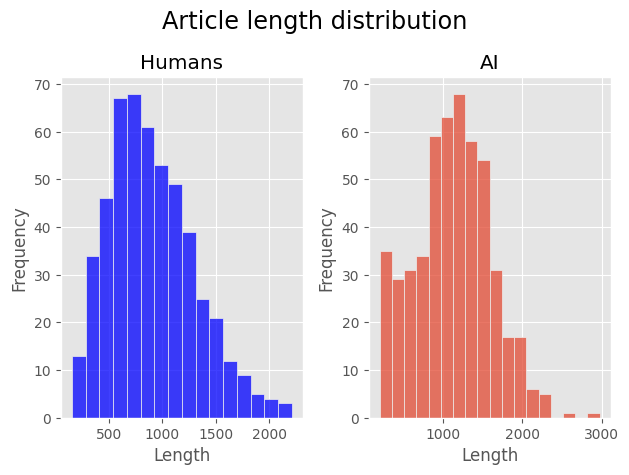

In [14]:
fig, axes = plt.subplots(1,2)
fig_dist_human = sns.histplot(data = data[data['class']==0], x = 'length', ax = axes[0], color='blue')
fig_dist_human.set(title = 'Humans', xlabel='Length', ylabel= 'Frequency')
fig_dist_ai = sns.histplot(data = data[data['class']==1], x = 'length', ax = axes[1])
fig_dist_ai.set(title = 'AI', xlabel='Length', ylabel= 'Frequency')
fig.suptitle('Article length distribution', fontsize =  'xx-large')
plt.tight_layout()
# We can see that the AI articles are a bit longer but not so much

<Axes: xlabel='length', ylabel='Density'>

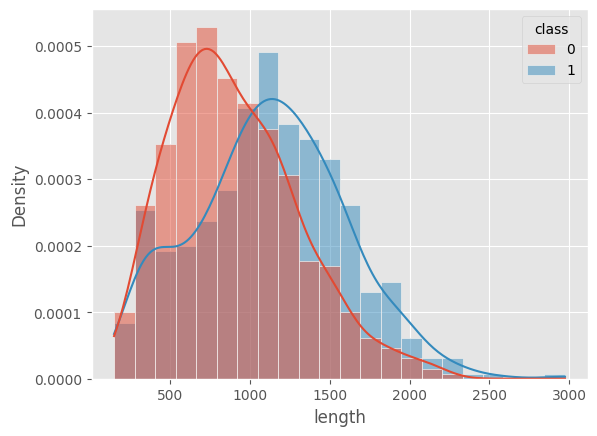

In [27]:
sns.histplot(data = data, x = 'length', hue="class", kde= True, stat = 'density' ) # Overlapped

#### words count

In [15]:
data['words'] = data['article'].apply(lambda x: len(str(x).split()))

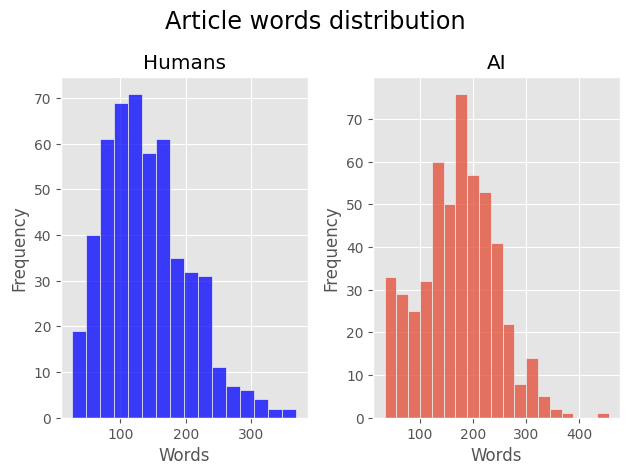

In [18]:
fig, axes = plt.subplots(1,2)
fig_dist_human = sns.histplot(data = data[data['class']==0], x = 'words', ax = axes[0], color='blue')
fig_dist_human.set(title = 'Humans', xlabel='Words', ylabel= 'Frequency')
fig_dist_ai = sns.histplot(data = data[data['class']==1], x = 'words', ax = axes[1])
fig_dist_ai.set(title = 'AI', xlabel='Words', ylabel= 'Frequency')
fig.suptitle('Article words distribution', fontsize =  'xx-large')
plt.tight_layout()

<Axes: xlabel='words', ylabel='Density'>

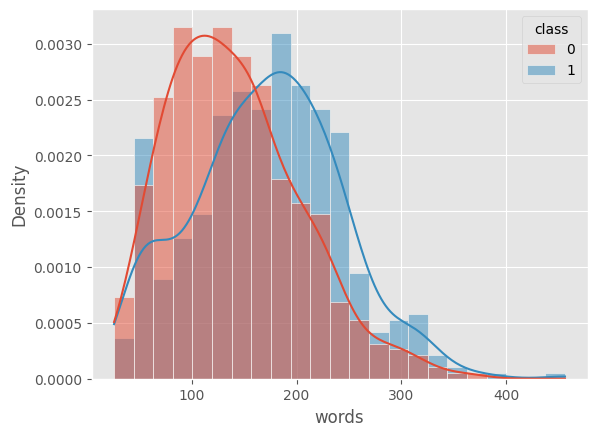

In [28]:
sns.histplot(data = data, x = 'words', hue="class", kde= True, stat = 'density' ) 

# EDA --> Term frequency analysis